**Submission Proyek Akhir : Klasifikasi Gambar oleh Calvin Jesse Maruli Siagian**

Pada submission ini code yang digunakan bersumber dari tutorial yang diberikan Dicoding pada klasifikasi messy-clean dan diberikan beberapa perubahan.

**Import TensorFlow dll**

In [69]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Download File**

In [70]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-07-08 18:38:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.41MB/s    in 80s     

2021-07-08 18:39:50 (3.83 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**Ekstrak File**


In [71]:
import os
import zipfile

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

**Membagi Data menjadi Data Training dan Data Validasi**

Jika diperhatikan pada file rockpaperscissors terdapat folder rps-cv-images yang di dalamnya berisi folder gambar rock,paper,scissors. Sehingga dari folder rps-cv-images tersebut akan displit untuk data training dan validasinya. Output foldernya dinamakan new_file.

In [72]:
pip install split-folders

In [73]:
import splitfolders

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'new_file', seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3982.80 files/s]


In [74]:
import os

data_training = os.path.join('new_file','train')
data_val = os.path.join('new_file','val')

os.listdir('new_file/train')
os.listdir('new_file/val')

['scissors', 'paper', 'rock']

**Membagi Data Training dan Validasi untuk Masing-Masing Rock, Paper, Scissors**

In [75]:
data_training_rock = os.path.join(data_training,'rock')
data_training_paper = os.path.join(data_training,'paper')
data_training_scissors = os.path.join(data_training,'scissors')

data_val_rock = os.path.join(data_val,'rock')
data_val_paper = os.path.join(data_val,'paper')
data_val_scissors = os.path.join(data_val,'scissors')

**Proses Augmentasi Gambar Menggunakan Image Generator**


In [76]:
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        data_training,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        data_val, 
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical')



Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**Membuat CNN**

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 15, 15, 128)     

**Loss Function dan Optimizer**

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Training Model**

In [79]:
training = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)



Epoch 1/20
25/25 - 6s - loss: 1.1978 - accuracy: 0.4400 - val_loss: 1.0845 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 6s - loss: 1.1031 - accuracy: 0.3700 - val_loss: 1.0916 - val_accuracy: 0.3500
Epoch 3/20
25/25 - 6s - loss: 1.0455 - accuracy: 0.4700 - val_loss: 0.9725 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.8947 - accuracy: 0.6500 - val_loss: 0.6851 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 5s - loss: 0.6702 - accuracy: 0.7400 - val_loss: 0.3318 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 6s - loss: 0.4765 - accuracy: 0.8300 - val_loss: 0.4359 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 6s - loss: 0.5133 - accuracy: 0.7900 - val_loss: 0.4469 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 6s - loss: 0.2713 - accuracy: 0.8900 - val_loss: 0.2945 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 5s - loss: 0.5142 - accuracy: 0.7900 - val_loss: 0.3736 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 5s - loss: 0.3359 - accuracy: 0.8500 - val_loss: 0.2130 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

**Mencetak Nilai Akurasi Tertinggi**

In [80]:
con_acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

print('Nilai akurasi tertinggi : ',max(con_acc))
print('Nilai akurasi validasi tertinggi : ',max(val_acc))

Nilai akurasi tertinggi :  0.9599999785423279
Nilai akurasi validasi tertinggi :  0.949999988079071


**Uji Coba**


Saving wKiW95hiPu8zQhwV.png to wKiW95hiPu8zQhwV.png
wKiW95hiPu8zQhwV.png
this is paper


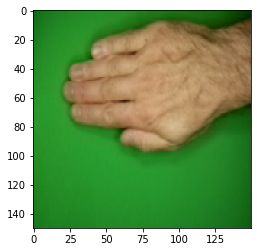

In [81]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                             
uploaded = files.upload()                                                        

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                           
  imgplot = plt.imshow(img)                                                      
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  
  if classes[0,0]==1:
    print('this is paper')                                 
  elif classes[0,1]==1:
    print('this is rock')                                   
  elif classes[0,2]==1:
    print('this is scissor')                                
  else:
    print('Eror')                                                      

**Sumber**

1. https://www.dicoding.com/academies/184/tutorials/8527
2. https://kotakode.com/pertanyaan/1919/Cara-split-image-folder-menjadi-train-dan-test
3. https://stackoverflow.com/questions/51047676/how-to-get-accuracy-of-model-using-keras
4. https://keras.io/api/optimizers/
5. https://stackoverflow.com/questions/43010339/python-tensorflow-input-to-reshape-is-a-tensor-with-92416-values-but-the-re
6. https://ghif.github.io/aiml/2017/04/11/optimisasi-pada-deep-learning.html

